### download the dogs and cats data set and unzip it

URL: https://www.microsoft.com/en-us/download/details.aspx?id=54765

You will run this to create the following folder structure:


```
test
     dog
     cat
train
     dog
     cat
```

Resize to whatever is the preferred new size

In [1]:
# read some pics and show
import cv2
import glob
from matplotlib import pyplot as plt
from matplotlib.image import imread
import random
import os
import shutil

%matplotlib inline

In [2]:
image_dir='PetImages'

dogs = glob.glob(image_dir + '/Dog/*.jpg')
cats = glob.glob(image_dir + '/Cat/*.jpg')

print('dogs image count:', len(dogs))
print('cats image count:', len(cats))

dogs image count: 12500
cats image count: 12500


In [3]:
def show_image(imgs):
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # define filename
        filename = imgs[i]
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        # show the figure
    plt.show()
    

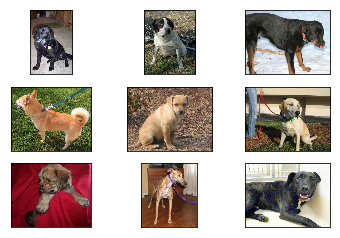

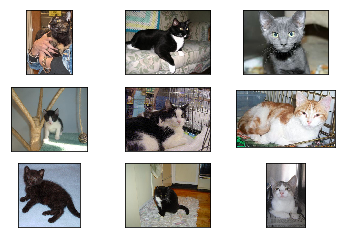

In [4]:
show_image(dogs)
show_image(cats)

In [5]:
# make a dir of train/cat:dog/image.jpg and test/cat|dog/image.jpg if not already exists

def make_dir(dir_name):
    os.makedirs(dir_name, exist_ok=True)

def delete_dir_content(dir_name):
    flist = glob.glob(dir_name + '/*.jpg')
    for f in flist:
        os.remove(f)

def copy_to_dir(list , dir_name):
    print('copying to:',dir_name)
    for f in list:
        shutil.copy2(f , dir_name)

def resize_image(flist , isize):
    for filename in flist:
        img = cv2.imread(filename)
        if not img is None:
            img2 = cv2.resize(img,(isize,isize),interpolation=cv2.INTER_AREA)
            cv2.imwrite(filename , img2)
            img = cv2.imread(filename)
            h , w , c = img.shape
            if not (h == isize and w == isize) :
                print('error cannot resize:', filename)
        else:
            os.remove(filename)
    
make_dir('train/dog')
make_dir('train/cat')
make_dir('test/dog')
make_dir('test/cat')

# delete the contents
delete_flag = True

if delete_flag:
    delete_dir_content('train/dog')
    delete_dir_content('train/cat')
    delete_dir_content('test/dog')
    delete_dir_content('test/cat')

    # train vs test 
    test_ratio = 0.25
    image_size = 224

    test_size = int( test_ratio * len(dogs))

    # copy random cat/dog files to train and test
    test_dogs = random.sample(dogs, test_size)
    test_cats = random.sample(cats, test_size)

    copy_to_dir(test_dogs , 'test/dog/')
    copy_to_dir(test_cats , 'test/cat/')

    train_dogs = [n for n in dogs if n not in test_dogs]
    train_cats = [n for n in cats if n not in test_cats]

    copy_to_dir(train_dogs , 'train/dog/')
    copy_to_dir(train_cats , 'train/cat/')
    
    test_list = glob.glob('test/*/*.jpg')
    train_list = glob.glob('train/*/*.jpg')
    
    print('image size:',image_size)
    print('resizing test...')
    resize_image(test_list , image_size)
    print('resizing train...')
    resize_image(train_list , image_size)
    
    

# show size
test_dog_list = glob.glob('test/dog/*.jpg')
test_cat_list = glob.glob('test/cat/*.jpg')
train_dog_list = glob.glob('train/dog/*.jpg')
train_cat_list = glob.glob('train/cat/*.jpg')


print('dog test size:', len(test_dog_list))
print('cat test size:', len(test_cat_list))

print('dog train size:', len(train_dog_list))
print('cat train size:', len(train_cat_list))


copying to: test/dog/
copying to: test/cat/
copying to: train/dog/
copying to: train/cat/
image size: 224
resizing test...
resizing train...
dog test size: 3118
cat test size: 3117
dog train size: 9352
cat train size: 9359
